## An√°lisis Exploratorio de Datos
### An√°lisis del comportamiendo del jugador en videojuegos online 

Importaciones y vista general del DataFrame:

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Se construye una ruta relativa para acceder a la carpeta donde se encuentran los datos.
ruta_data = os.path.join("..", "data", "online_gaming_behavior_dataset.csv")

#Visualizacion de datos en dataframe.
df_game_behaviour = pd.read_csv(ruta_data)

df_game_behaviour

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
0                    0         Medium                6   
1                    0         Medium                5   
2                    0           Easy               16   
3                    1           Easy                9   
4                    0         Medium                2   
...                ...            ...              ...   
40029                0           Easy                4   
40030                0           Hard               19   
40031                1           Easy               10   
40032                1         Medium                3   
40033                0           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  
0              Medium  
1              Medium  
2                High  
3              Medium  
4              Medium  
...               ...  
40029          Medium  
40030            High  
40031            High  
40032          Medium  
40033          Medium  

[40034 rows x 13 columns]

In [3]:
df_game_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [17]:
df_game_behaviour.describe()

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [4]:
#Visualizaci√≥n general de frecuencia de valores por cada columna del DataFrame. 
for columna in df_game_behaviour:
    print(f"Frecuencia de valores en: {df_game_behaviour[columna].value_counts()}")
    print("")

Frecuencia de valores en: PlayerID
49033    1
9000     1
49017    1
49016    1
49015    1
        ..
9006     1
9005     1
9004     1
9003     1
9002     1
Name: count, Length: 40034, dtype: int64

Frecuencia de valores en: Age
31    1228
37    1219
27    1217
40    1202
42    1187
29    1187
43    1180
18    1167
44    1166
32    1163
36    1154
24    1153
35    1151
22    1150
30    1150
17    1149
38    1140
19    1139
16    1138
23    1130
39    1128
21    1128
33    1123
46    1121
20    1113
41    1111
25    1108
28    1108
45    1108
26    1107
49    1106
34    1103
47    1102
15    1101
48    1097
Name: count, dtype: int64

Frecuencia de valores en: Gender
Male      23959
Female    16075
Name: count, dtype: int64

Frecuencia de valores en: Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Frecuencia de valores en: GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count

In [5]:
df_game_behaviour.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

#### Hip√≥tesis principal: 
- Los jugadores con mayor engagement tienden a realizar m√°s compras dentro del juego.
#### Hip√≥tesis secundarias:
- El nivel de engagement influye en el tiempo que se invierte en el juego y en los logros conseguidos, as√≠ como en las decisiones de compra.
- Los juegos de RPG tienen mayor engagement y mayor porcentaje de compras. 


#### Objetivos:
- Determinar si existe relaci√≥n entre las variables ***EngagementLevel*** e ***InGamePurchases***
- Determinar si influyen otras variables en la decisi√≥n de compra (horas de juego, logros conseguidos, sexo, edad, etc)
- Determinar si existe alg√∫n g√©nero en el que se realicen m√°s compras y tenga mayor engagement.
- Construcci√≥n del perfil tipo de comprador (seg√∫n g√©nero del juego).

#### Tipificaci√≥n de los datos
##### Cardinalidad:

In [23]:
#Primero hacemos una valoraci√≥n generalizada de los valores √∫nicos del dataframe:
cardinalidad = df_game_behaviour.nunique()
cardinalidad

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [26]:
#Vemos tambi√©n la cardinalidad en porcentajes para que nos ayude a determinar el umbral para la clasificiaci√≥n de varibales:
porcentaje_cardinalidad = cardinalidad/len(df_game_behaviour)*100
porcentaje_cardinalidad

PlayerID                     100.000000
Age                            0.087426
Gender                         0.004996
Location                       0.009992
GameGenre                      0.012489
PlayTimeHours                100.000000
InGamePurchases                0.004996
GameDifficulty                 0.007494
SessionsPerWeek                0.049958
AvgSessionDurationMinutes      0.424639
PlayerLevel                    0.247290
AchievementsUnlocked           0.124894
EngagementLevel                0.007494
dtype: float64

In [29]:
#Visualizamos los tipos de datos para a√±adirlos posteriormente a un dataframe que recoja cardinalidad, porcentaje de cardinalidad y tipo:
tipo = df_game_behaviour.dtypes

df_cardinalidad = pd.DataFrame({"cardinalidad" : cardinalidad,
                                "%_cardinalidad" : porcentaje_cardinalidad,
                                "tipo_dato" : tipo})
df_cardinalidad.reset_index()

index  cardinalidad  %_cardinalidad tipo_dato
0                    PlayerID         40034      100.000000     int64
1                         Age            35        0.087426     int64
2                      Gender             2        0.004996    object
3                    Location             4        0.009992    object
4                   GameGenre             5        0.012489    object
5               PlayTimeHours         40034      100.000000   float64
6             InGamePurchases             2        0.004996     int64
7              GameDifficulty             3        0.007494    object
8             SessionsPerWeek            20        0.049958     int64
9   AvgSessionDurationMinutes           170        0.424639     int64
10                PlayerLevel            99        0.247290     int64
11       AchievementsUnlocked            50        0.124894     int64
12            EngagementLevel             3        0.007494    object

##### Clasificaci√≥n de variables:

In [52]:
#Funcion para calcular la cardinalidad y clasificar las varibales seg√∫n su tipo:
def clasificador_variables(df,umbral_categoria, umbral_continua):
    ''' Devuelve un dataframe con la cardinalidad de los valores de cada columna, su porcentaje de cardinalidad
        y el tipo de clasficiaci√≥n de cada variable seg√∫n los par√°metros introducidos.

        Atenci√≥n: est√° adaptada a las necesidades de este EDA.
        
        Argumentos:
        df : pandas.Dataframe del que queremos obtener la cardinalidad y clasificaci√≥n de variables
        umbral_categorica: umbral establecido para determinar el tipo de las variables categ√≥ricas.
        umbral_continua: umbral establecido para determinar el tipo de las varibales num√©ricas. 
    '''
    
    df = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad, porcentaje y tipo de datos.
    df = df.T # Transponer para obtener los datos en filas
    df = df.rename(columns = {0: "Cardinalidad", 
                              1: "%_Cardinalidad", 
                              2: "Tipo"}) # Renombra las columnas


    # Se aplican los filtros para la clasificaci√≥n de las variables:
    df["Tipo_Variable"] = "Categ√≥rica"  #Por defecto ser√°n categ√≥ricas ya que muchas de ellas lo son.
    df.loc[df["Cardinalidad"] == 2, "Tipo_Variable"] = "Binaria"
    df.loc[df["Cardinalidad"] >= umbral_categoria, "Tipo_Variable"] = "Num√©rica discreta"
    df.loc[df["%_Cardinalidad"] >= umbral_continua, "Tipo_Variable"] = "Num√©rica continua"

    return df

In [66]:
df_clasificacion = clasificador_variables(df_game_behaviour, 10, 10)
df_clasificacion

Cardinalidad %_Cardinalidad     Tipo  \
PlayerID                         40034          100.0    int64   
Age                                 35       0.087426    int64   
Gender                               2       0.004996   object   
Location                             4       0.009992   object   
GameGenre                            5       0.012489   object   
PlayTimeHours                    40034          100.0  float64   
InGamePurchases                      2       0.004996    int64   
GameDifficulty                       3       0.007494   object   
SessionsPerWeek                     20       0.049958    int64   
AvgSessionDurationMinutes          170       0.424639    int64   
PlayerLevel                         99        0.24729    int64   
AchievementsUnlocked                50       0.124894    int64   
EngagementLevel                      3       0.007494   object   

                               Tipo_Variable  
PlayerID                   Num√©rica continua  
Age                        Num√©rica discreta  
Gender                               Binaria  
Location                          Categ√≥rica  
GameGenre                         Categ√≥rica  
PlayTimeHours              Num√©rica continua  
InGamePurchases                      Binaria  
GameDifficulty                    Categ√≥rica  
SessionsPerWeek            Num√©rica discreta  
AvgSessionDurationMinutes  Num√©rica discreta  
PlayerLevel                Num√©rica discreta  
AchievementsUnlocked       Num√©rica discreta  
EngagementLevel                   Categ√≥rica

#### Observaciones de la clasificaci√≥n:
 - Hay poca variabilidad en los datos. A pesar de que la muestra es grande, la cardinalidad en las variables num√©ricas nos es muy alta si la comparamos con el total de datos. 
 - Existen variables con una cardinalidad del 100% y que podr√≠an obviarse dentro del estudio (Id de jugador y el tiempo de juego). 
 - ¬øQue exista poca variaci√≥n en los datos indica que los jugadores tienen perfiles muy parecidos?

#### Definici√≥n de los datos:

- __Dataset__: online_gaming_behavior_dataset.csv
    - Fuente: Rabie El Kharoua. (2024). üéÆ Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674
- __Descripci√≥n__: Datos demogr√°ficos y m√©tricas sobre una muestra que recoge el comportamiento del jugador en juegos online. 
- __Periodo__: 2024 

Columna/Variable | Descripci√≥n	| Tipo_de_Variable	| Importancia Inicial	| Nota
---------------- | ------------ | --------------	| ----------------------| ------
PlayerID         | Identificaci√≥n del jugador | Num√©rica Continua | - | 
Age         | Edad del jugador | Num√©rica Discreta | 2 | 
Gender       | Sexo del jugador | Binaria | 2 | 
Location         | Zona geogr√°fica del jugador | Categ√≥rica Nominal| 3 | 
Genre        | G√©nero del juego | Categ√≥rica Nominal | 1 | 
PlayTimeHours | Promedio de tiempo jugado por sesi√≥n |Num√©rica Continua| 1 | En horas 
InGamePurchases | Compras realizadas en el juego | Binaria | 0 | 0 = No, 1 = S√≠
GameDifficulty | Nivel de dificultad del juego |Categ√≥rical Nominal| 3 | 
SessionsPerWeek | N√∫mero de sesiones de juego por semana | Num√©rica Discreta | 2 |
AvgSessionDurationMinutes | Duraci√≥n media por sesi√≥n | Num√©rica Discreta | 3 | En minutos
PlayerLevel | Nivel del jugador en el juego | Num√©rica Discreta| 3 | 
AchievementsUnlocked  | Numero de logros desbloqueados en el juego |Num√©rica Discreta | 1 | Suelen ser premios/medallas/distinciones por misiones completadas
EngagementLevel | Nivel de engagement del jugador | Categ√≥rica Nominal | 0 | 

#### Tendencia Central

##### Media
Variables num√©ricas

In [54]:
df_game_behaviour.describe().loc["mean"]

PlayerID                     29016.500000
Age                             31.992531
PlayTimeHours                   12.024365
InGamePurchases                  0.200854
SessionsPerWeek                  9.471774
AvgSessionDurationMinutes       94.792252
PlayerLevel                     49.655568
AchievementsUnlocked            24.526477
Name: mean, dtype: float64

Observaciones:
- La media de edad de los jugadores de la muestra es de 32 a√±os
- El tiempo invertido de juego es elevado; 12h de media por sesi√≥n, 9 sesiones a la semana 
- La media en compras es muy baja.


##### Mediana
Comprobaciones y comparaci√≥n con la media

In [63]:
df_game_behaviour.describe().loc["50%"]

PlayerID                     29016.500000
Age                             32.000000
PlayTimeHours                   12.008002
InGamePurchases                  0.000000
SessionsPerWeek                  9.000000
AvgSessionDurationMinutes       95.000000
PlayerLevel                     49.000000
AchievementsUnlocked            25.000000
Name: 50%, dtype: float64

Observaciones:
- Tanto la media como la mediana tienen valores similares.
- Parece que no haya outliers o datos muy dispares.
- Comprobamos los valores m√°ximos:


In [64]:
df_game_behaviour.describe().loc["max"]

PlayerID                     49033.000000
Age                             49.000000
PlayTimeHours                   23.999592
InGamePurchases                  1.000000
SessionsPerWeek                 19.000000
AvgSessionDurationMinutes      179.000000
PlayerLevel                     99.000000
AchievementsUnlocked            49.000000
Name: max, dtype: float64

##### Moda
Variables categ√≥ricas

In [8]:
# Pasamos las variables categ√≥ricas a una lista.
categoricas = [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
]
                
df_game_behaviour[categoricas].mode().T #Obtenemos la moda de cada categ√≥rica y transponemos el dataframe para una mejor visualizaci√≥n

0
Gender             Male
Location            USA
GameGenre        Sports
GameDifficulty     Easy
EngagementLevel  Medium

Observaciones:
- La mayor√≠a de jugadores son hombres de Norteam√©rica.
- El g√©nero m√°s popular es el de deportes, aunque por muy poca diferencia con el resto.
- El nivel de dificultad m√°s jugado es en modo f√°cil.
- El nivel de engagement es medio. 

### An√°lisis Univariante

#### Frecuencias

In [14]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    ''' Devuelve la distribuci√≥n de las variables categ√≥ricas en gr√°ficas.

        Args:
        df: Pandas DataFrame
        columnas_categoricas: variables categoricas
        relativa : por defecto false. Para que sea absoluta =True
        mostrar_valores: por defecto false
    '''
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='cool', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='cool', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribuci√≥n de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


##### Absoluta

In [33]:
#En este caso vamos a incluir nuestra variable directoria InGamePurchase como categ√≥rica para ver su frecuencia:
categoricas_2 =  [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
                "InGamePurchases"
]

In [34]:
#Vemos los valores √∫nicos de cada categ√≥rica:
for categoria in categoricas_2:
    print(f"Valores √∫nicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts())
    print("")

Valores √∫nicos en Gender
Gender
Male      23959
Female    16075
Name: count, dtype: int64

Valores √∫nicos en Location
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Valores √∫nicos en GameGenre
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

Valores √∫nicos en GameDifficulty
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

Valores √∫nicos en EngagementLevel
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

Valores √∫nicos en InGamePurchases
InGamePurchases
0    31993
1     8041
Name: count, dtype: int64



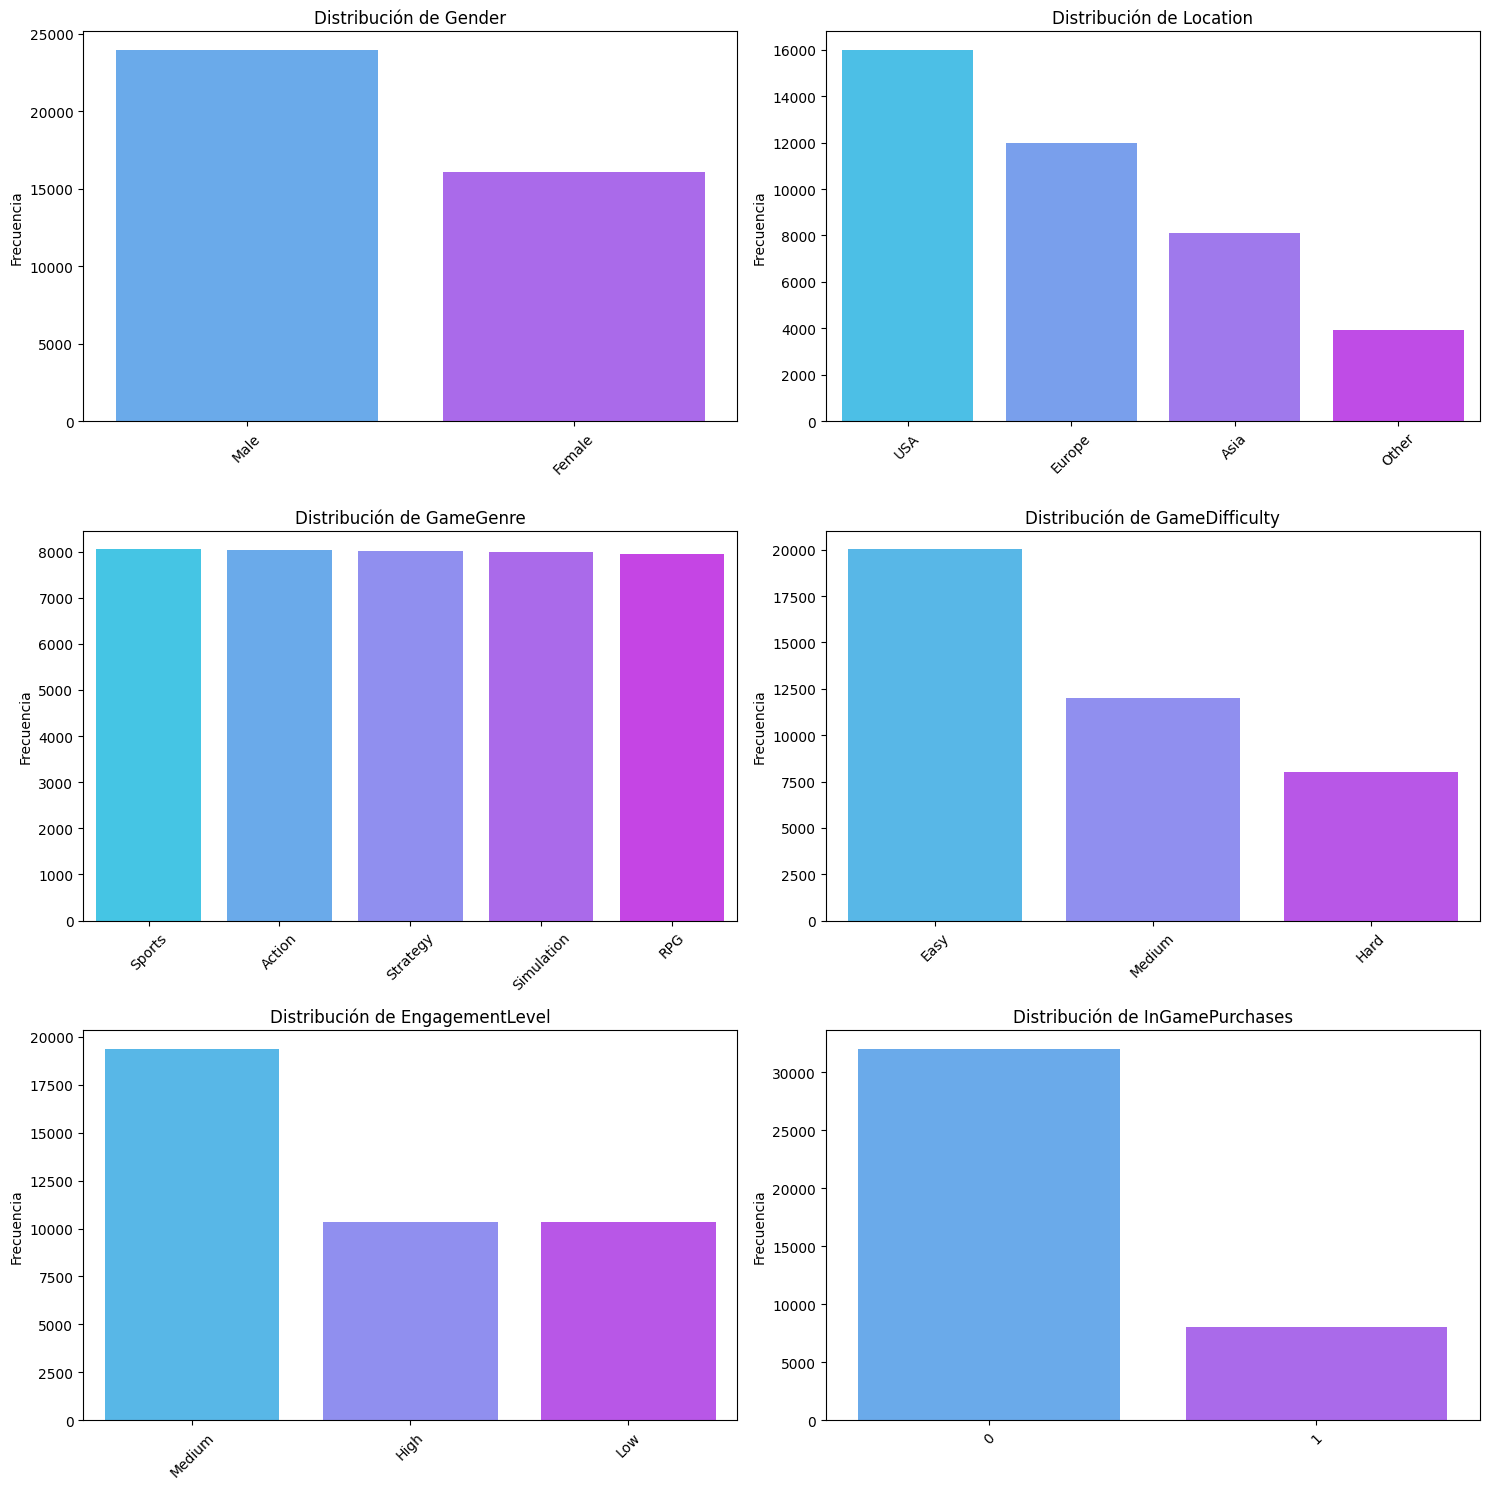

In [35]:
#Vemos representaci√≥n gr√°fica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2)

##### Relativa

In [36]:
#Vemos los valores √∫nicos de cada categ√≥rica:
for categoria in categoricas_2:
    print(f"Valores √∫nicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts()/len(df_game_behaviour)*100)
    print("")

Valores √∫nicos en Gender
Gender
Male      59.84663
Female    40.15337
Name: count, dtype: float64

Valores √∫nicos en Location
Location
USA       39.966029
Europe    29.984513
Asia      20.220313
Other      9.829145
Name: count, dtype: float64

Valores √∫nicos en GameGenre
GameGenre
Sports        20.102913
Action        20.080432
Strategy      20.012989
Simulation    19.940551
RPG           19.863116
Name: count, dtype: float64

Valores √∫nicos en GameDifficulty
GameDifficulty
Easy      49.995004
Medium    30.001998
Hard      20.002997
Name: count, dtype: float64

Valores √∫nicos en EngagementLevel
EngagementLevel
Medium    48.393865
High      25.818055
Low       25.788080
Name: count, dtype: float64

Valores √∫nicos en InGamePurchases
InGamePurchases
0    79.914573
1    20.085427
Name: count, dtype: float64



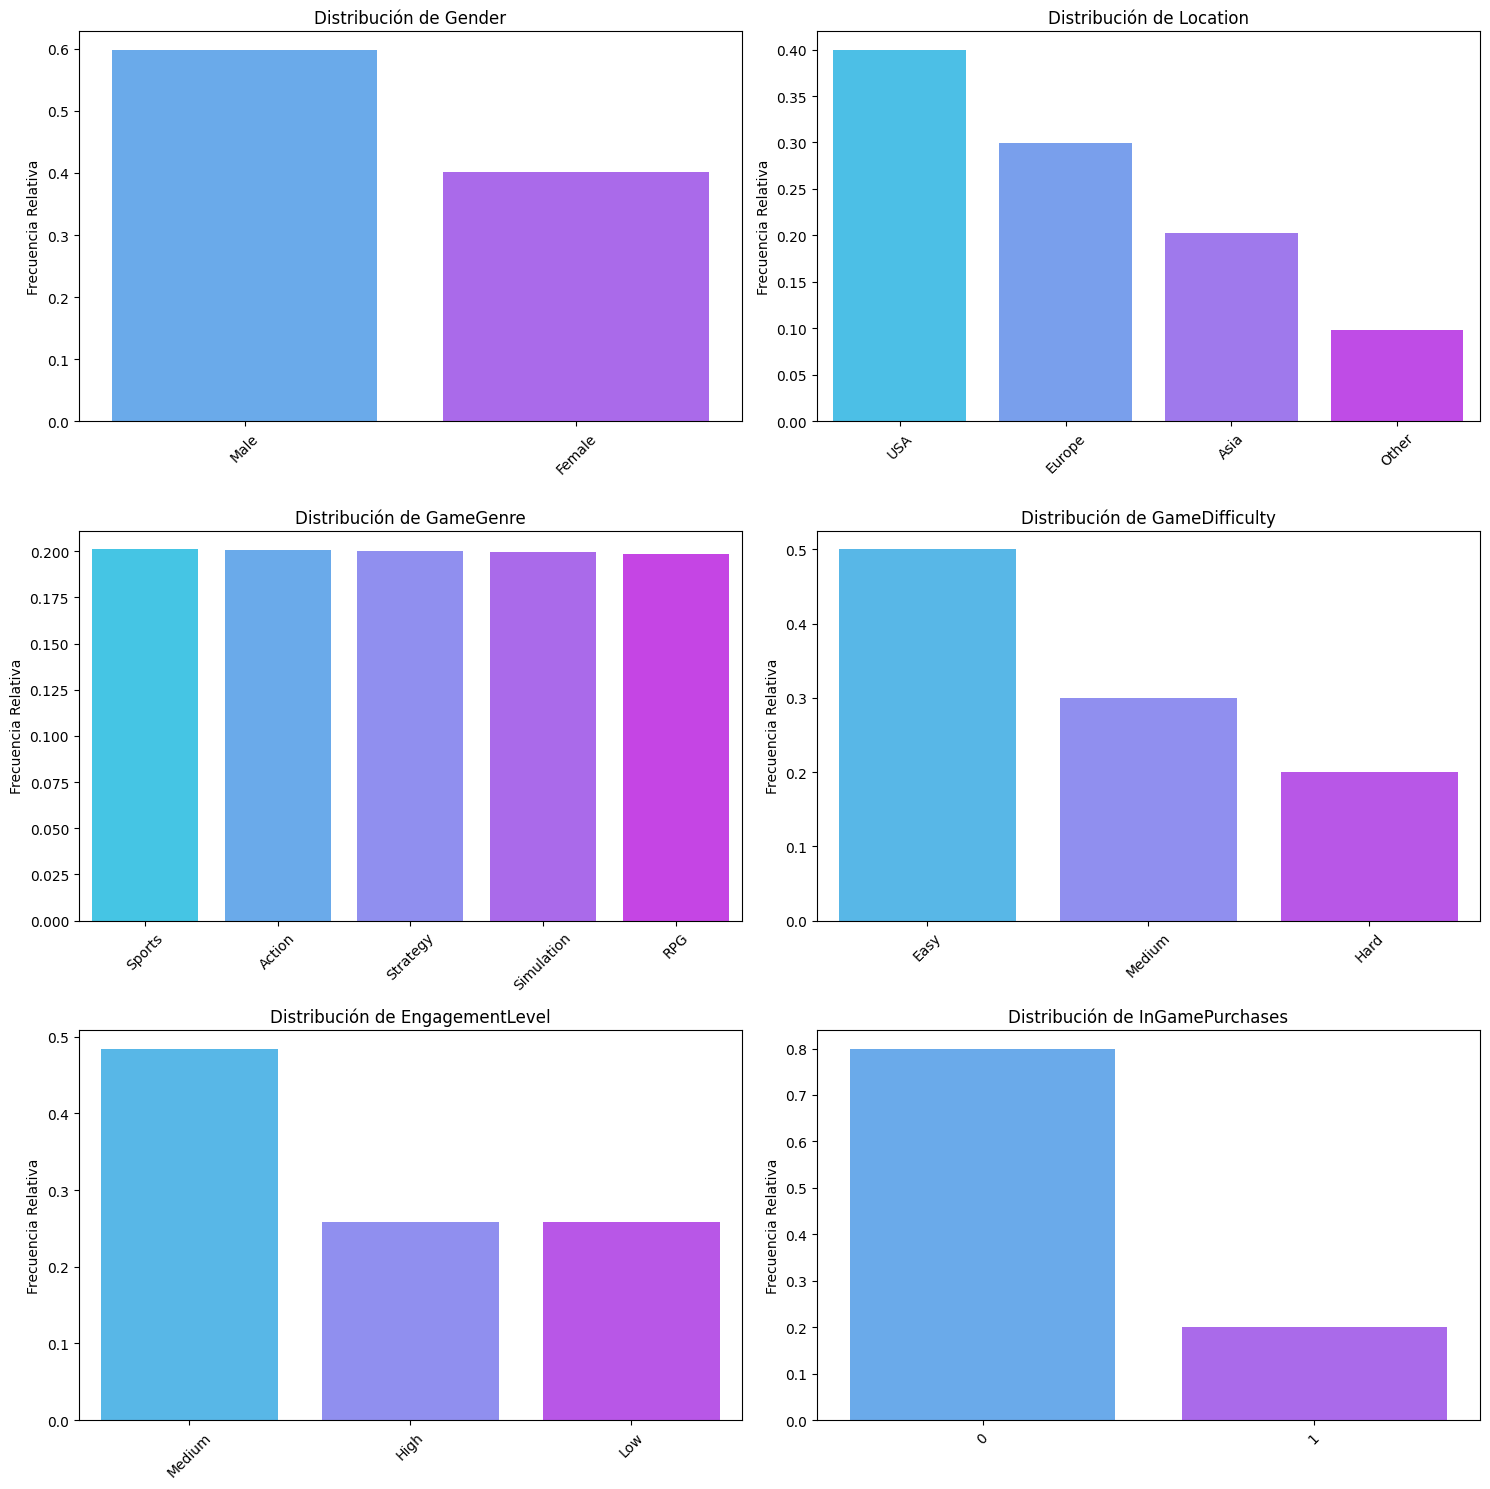

In [37]:
#Vemos representaci√≥n gr√°fica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2, relativa=True)

Observaciones y preguntas:
- No existe una diferencia significativa de popularidad entre los g√©neros de juego. ¬øQu√© genero es el que tiene mayor nivel de engagement?¬øY en el que m√°s compras se realizan? 
- El nivel de engagement que predomina es medio representando casi el 50% de la muestra. Los niveles de engagement m√°s alto y m√°s bajo representan el otro 50% de la muestra. ¬øQu√© otras variables influyen? ¬øInfluyen los logros conseguidos? ¬øSe consiguen m√°s logros en un niveles m√°s f√°ciles?
- Las compras dentro del juego no son significativas. ¬øExiste un perfil de compra espec√≠fico? ¬øInfluyen otras variables?


#### Medidas de posici√≥n y rangos

##### C√°lculo del IQR y Rango de cada variable num√©rica: 

In [38]:
def get_IQR(df, col):
    '''
        Devuelve el rango intercuant√≠lico de una variable.

        Args:
        df: Pandas Dataframe
        col: columna (variable) del dataframe 
    '''
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [81]:
# Pasamos las variables num√©ricas a una lista.
# No se tiene en cuenta Player ID ya que puede tratarse como index. Por otro lado, tampoco contamos con InGamePurchases ya que se ha considerado como categ√≥rica. 
numericas = [ "Age",
             "PlayTimeHours", 
             "SessionsPerWeek",
             "AvgSessionDurationMinutes", 
             "PlayerLevel",
             "AchievementsUnlocked"          
]

# Recorremos la lista para mostrar por pantalla el IQR, mediana y rango para poder compararlos: 
for variable in numericas:
    print(f"Para {variable}:")
    print(f"IQR: {get_IQR(df_game_behaviour, variable)}")
    print(f"Mediana: {df_game_behaviour[variable].describe().loc["50%"]}")
    print(f"Rango:{df_game_behaviour[variable].describe().loc["max"] - df_game_behaviour[variable].describe().loc["min"]}")
    print("")

Para Age:
IQR: 18.0
Mediana: 32.0
Rango:34.0

Para PlayTimeHours:
IQR: 11.89633063054563
Mediana: 12.00800215801307
Rango:23.999476946960538

Para SessionsPerWeek:
IQR: 10.0
Mediana: 9.0
Rango:19.0

Para AvgSessionDurationMinutes:
IQR: 85.0
Mediana: 95.0
Rango:169.0

Para PlayerLevel:
IQR: 49.0
Mediana: 49.0
Rango:98.0

Para AchievementsUnlocked:
IQR: 25.0
Mediana: 25.0
Rango:49.0



In [82]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    ''' 
        Devuelve una gr√°fica con el conjunto de diagrama de cajas de cada variable num√©rica.

        Args:
        df: Pandas Dataframe
        columns : columna (variable) del dataframe
        dim_matriz_visual : por defecto 2 columnas 
    '''
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i], color="skyblue")
            axes[i].set_title(column)

    # Ocultar ejes vac√≠os
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

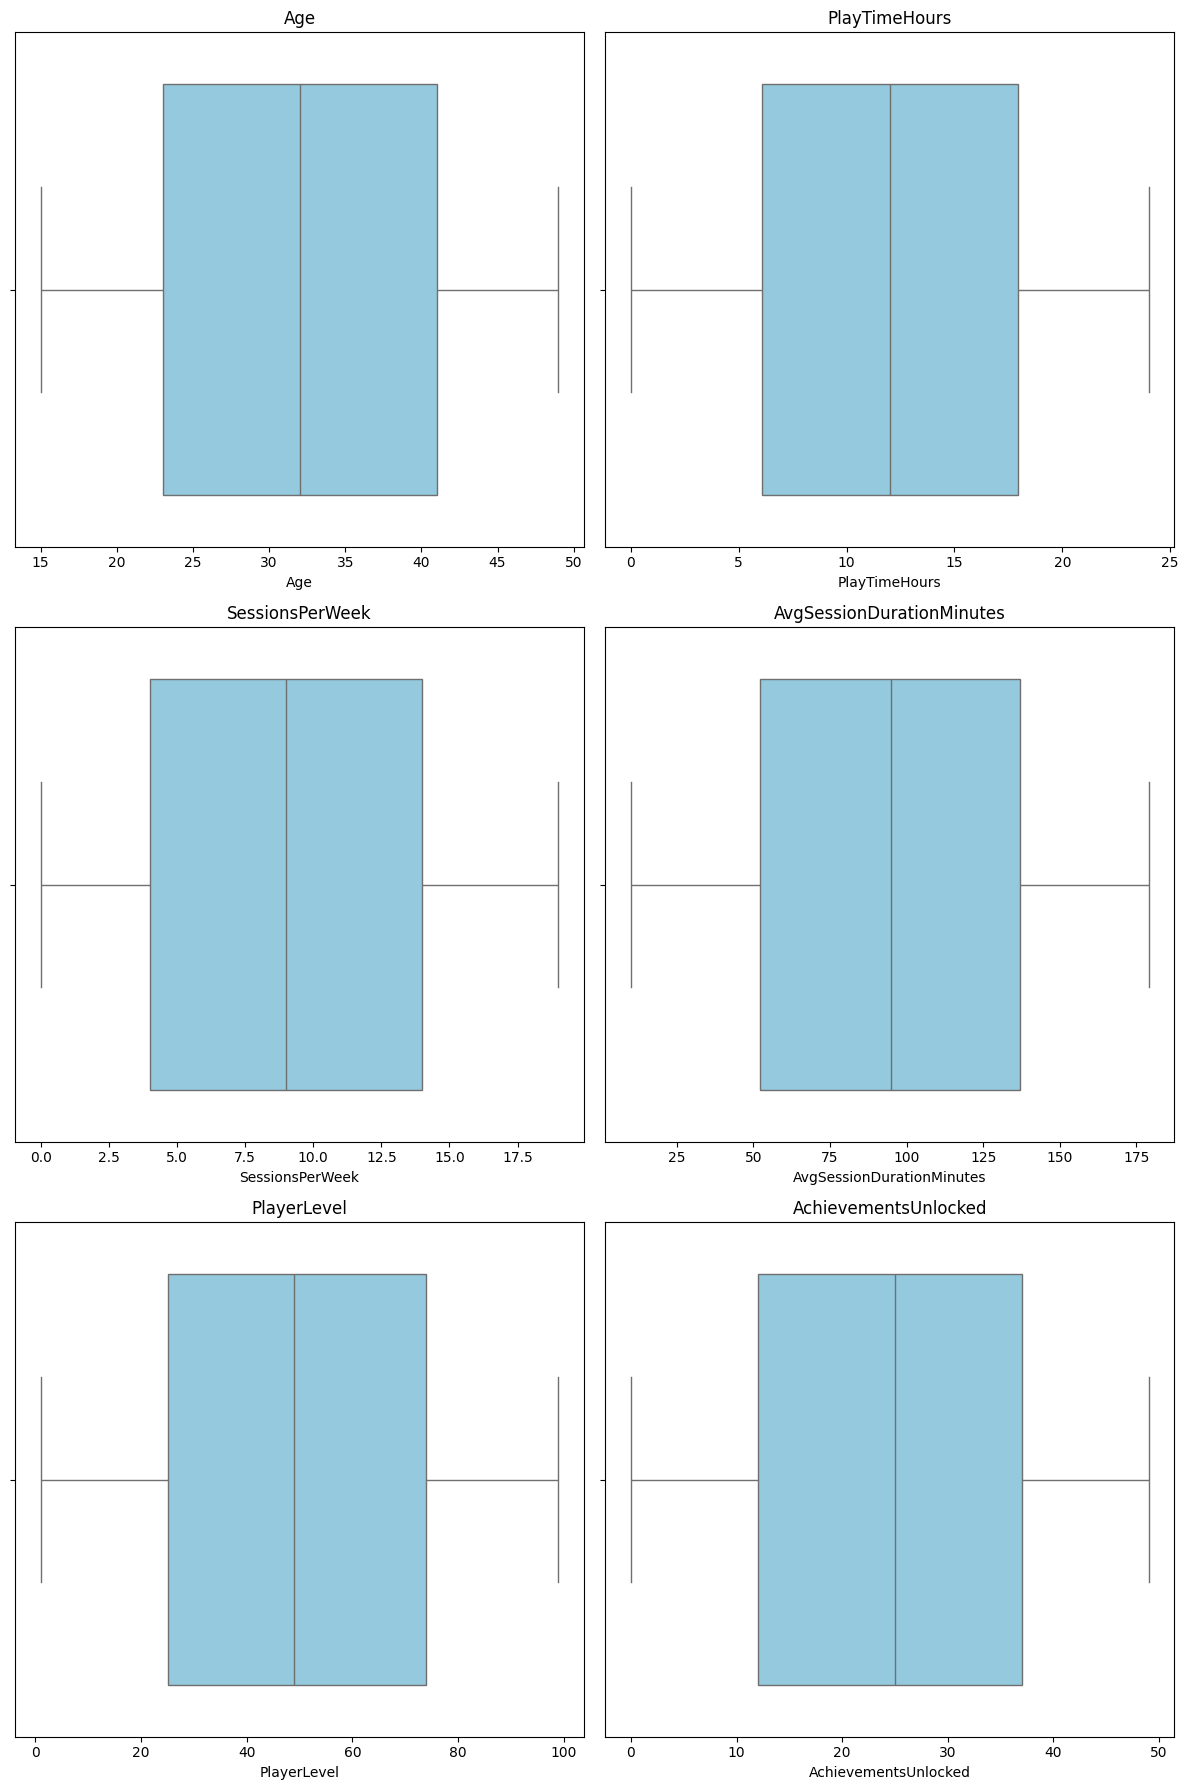

In [83]:
plot_multiple_boxplots(df_game_behaviour, numericas)

Observaciones:
- Las variables num√©ricas son homog√©neas, no hay outliers. 
- Como se observaba anteriormente, ¬øquiere decir que el comportamiento de juego es similar entre los usuarios?


#### Medidas de dispersi√≥n

In [52]:
#Vemos el coeficiente de variaci√≥n:
def variabilidad(df):
    '''
        Devuelve el coeficiente de variaci√≥n (CV) en porcentajes.
    '''
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [84]:
variabilidad(df_game_behaviour[numericas])

std       mean        CV
Age                        10.043227  31.992531  0.313924
PlayTimeHours               6.914638  12.024365  0.575052
SessionsPerWeek             5.763667   9.471774  0.608510
AvgSessionDurationMinutes  49.011375  94.792252  0.517040
PlayerLevel                28.588379  49.655568  0.575734
AchievementsUnlocked       14.430726  24.526477  0.588373

Observaciones

#### Distribuci√≥n
##### Histograma y KDE

In [94]:
def plot_histo_den(df, columns):
    '''
        Muestra el conjunto de histogramas y densidad en una figura.

        Args:
        df: Pandas Dataframe
        columns: columnas(variables) num√©ricas. 
    '''
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i], color="orange", bins=20)
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vac√≠os
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

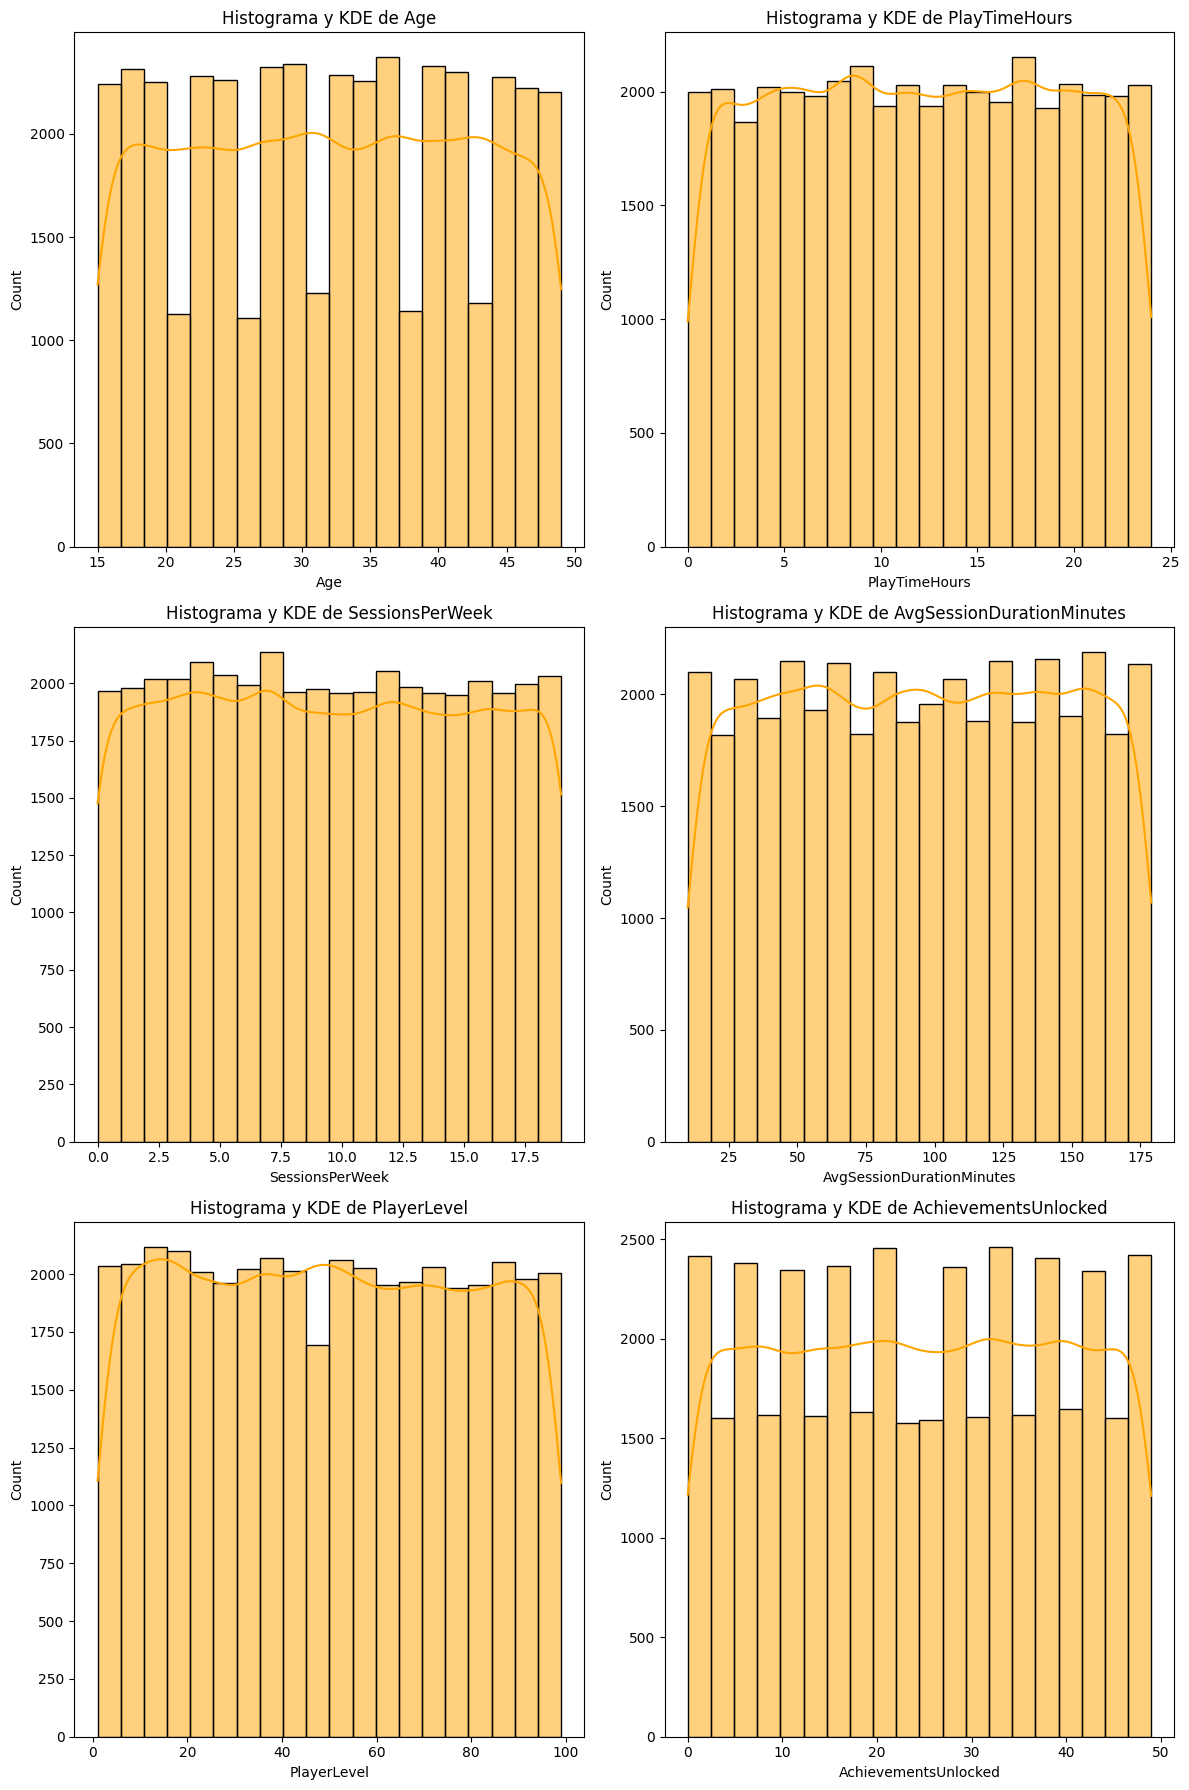

In [95]:
#Hacemos una vista general de todas la variables num√©ricas:
plot_histo_den(df_game_behaviour, numericas)

#### Revisi√≥n de Outliers
Apriori, no se observan outliers en la muestra.

In [97]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    ''' Devuelve una figura que combina diagramas de cajas e histogramas por cada variable.
        
        Args:
        df: Pandas Dataframe
        columns: columnas(variables) num√©ricas.
        whisker_width: por defecto 1.5
    '''
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], color="orange", bins=20)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width, color="skyblue")
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


(6, 2)


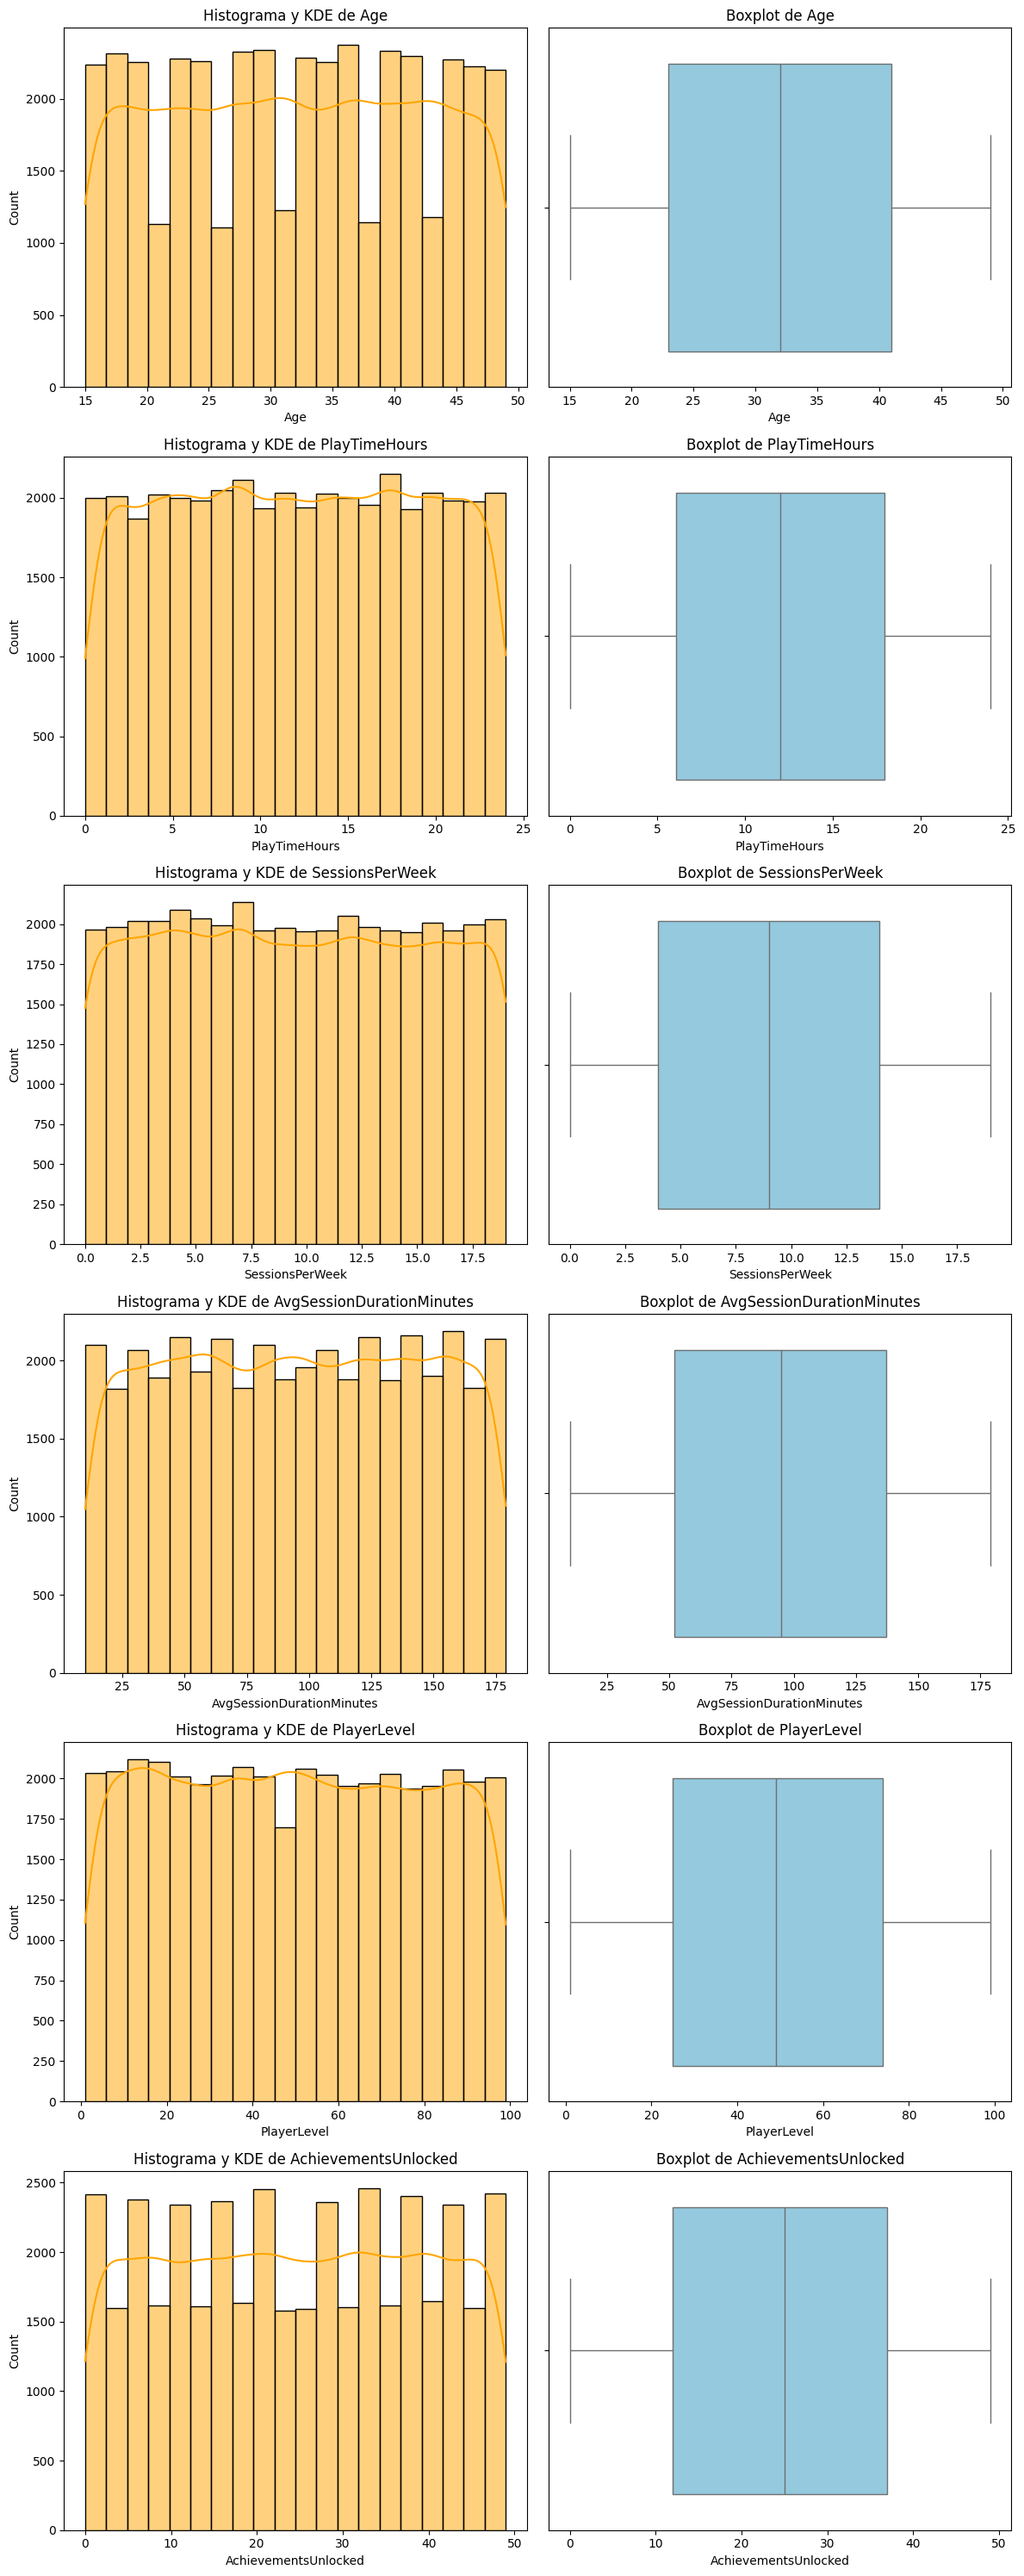

In [98]:
plot_combined_graphs(df_game_behaviour, numericas)

La variable PlayTimeHours es num√©rica continua y todos sus valores son diferentes. Probamos a aplicar la funci√≥n logar√≠tmica para ver si obtenemos algo m√°s de informaci√≥n.
Su valor m√°ximo no es muy dispar de la media

Text(0.5, 1.0, 'playtimeH_log Boxplot')

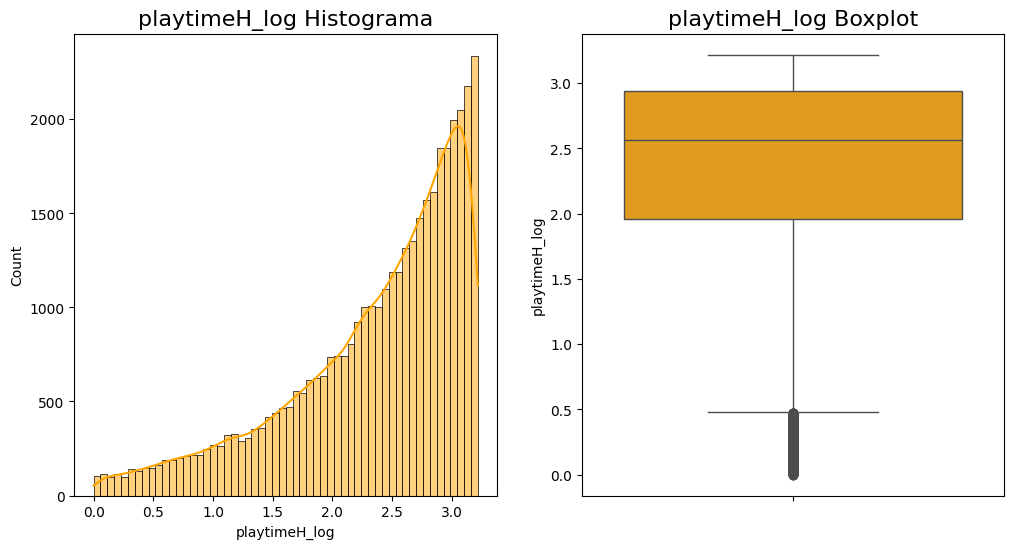

In [22]:
#Creamos una copia del dataframe para hacer pruebas con log en las columnas que m√°s dispersi√≥n tienen.
df_game_behaviour_copy = df_game_behaviour.copy()

df_game_behaviour_copy["playtimeH_log"] = np.log(df_game_behaviour_copy["PlayTimeHours"]+1)

plt.figure(figsize = (12,6))

plt.subplot(121)
ax = sns.histplot(df_game_behaviour_copy["playtimeH_log"],color='orange', kde=True)
ax.set_title('playtimeH_log Histograma', fontsize=16);

plt.subplot(122)
ax1 = sns.boxplot(df_game_behaviour_copy["playtimeH_log"],color='orange')
ax1.set_title('playtimeH_log Boxplot', fontsize= 16)


Text(0.5, 1.0, 'Dispersi√≥n Variables num√©ricas')

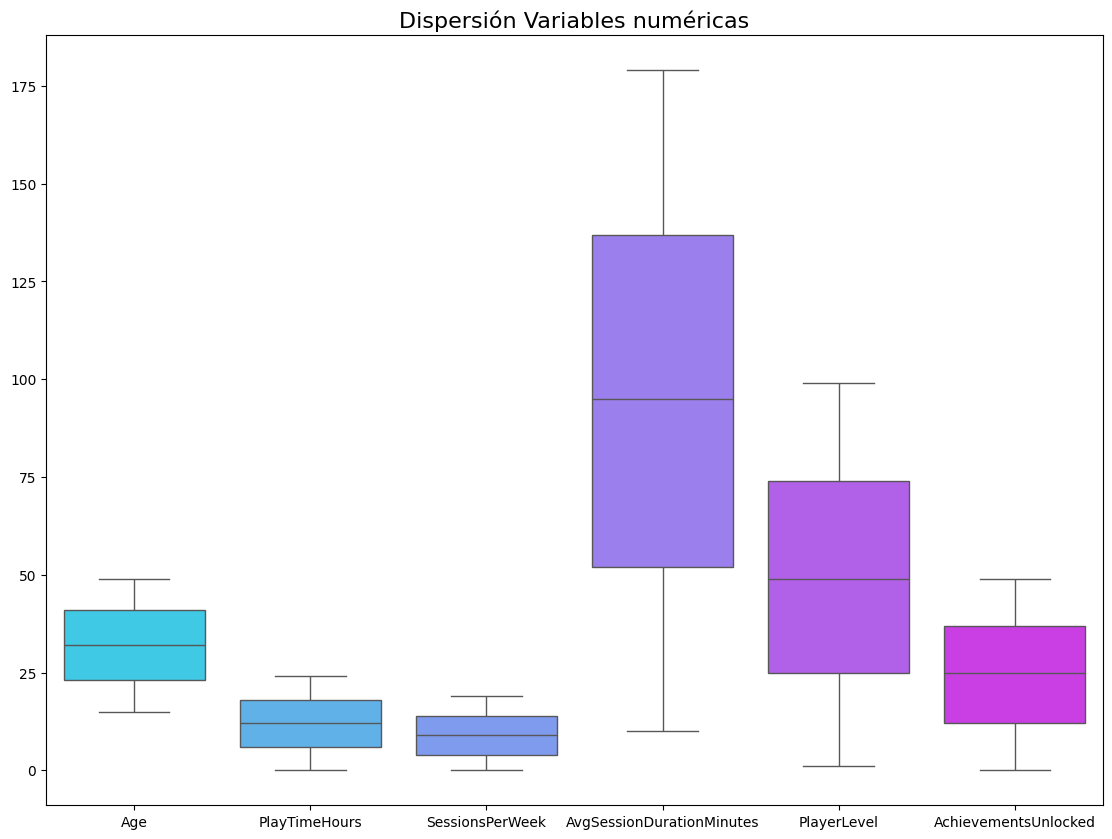

In [10]:
#Vemos todos los diagramas de caja de las variables num√©ricas en una sola figura:
plt.figure(figsize = (30, 10))


plt.subplot(122)
ax1 = sns.boxplot(df_game_behaviour[[ "Age",
             "PlayTimeHours", 
             "SessionsPerWeek",
             "AvgSessionDurationMinutes", 
             "PlayerLevel",
             "AchievementsUnlocked"          
]],palette='cool')
ax1.set_title('Dispersi√≥n Variables num√©ricas', fontsize= 16)

#### An√°lisis Bivariante
##### Categ√≥ricas

##### IngamePurchases vs EngagementLevel:

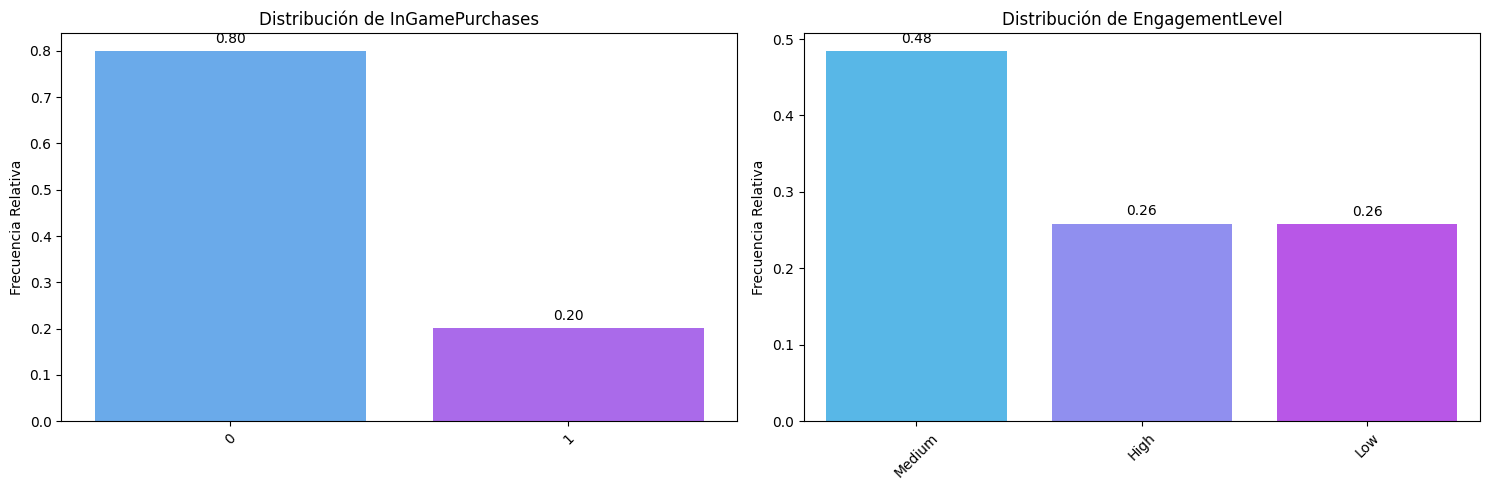

In [15]:
#Vemos primero ambas graficas juntas.
pinta_distribucion_categoricas(df_game_behaviour, ["InGamePurchases", "EngagementLevel"], relativa=True, mostrar_valores=True)

In [16]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay m√°s de size_group categor√≠as en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categor√≠as para cada gr√°fico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gr√°fico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # A√±ade t√≠tulos y etiquetas
            plt.title(f'Relaci√≥n entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gr√°fico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gr√°fico
            plt.show()
    else:
        # Crea el gr√°fico para menos de size_group categor√≠as
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # A√±ade t√≠tulos y etiquetas
        plt.title(f'Relaci√≥n entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gr√°fico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gr√°fico
        plt.show()

##### Absoluta

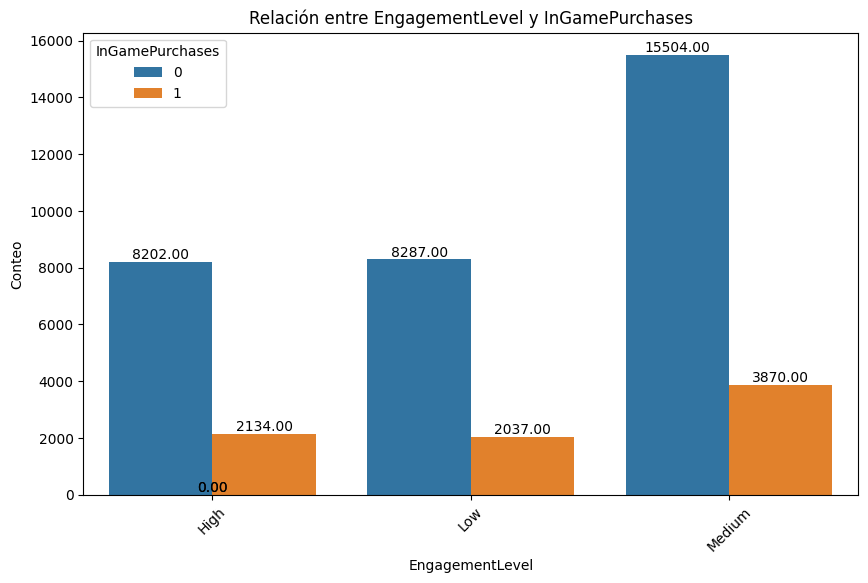

In [22]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases", relative_freq=False, show_values=True, size_group = 5)

##### Relativa

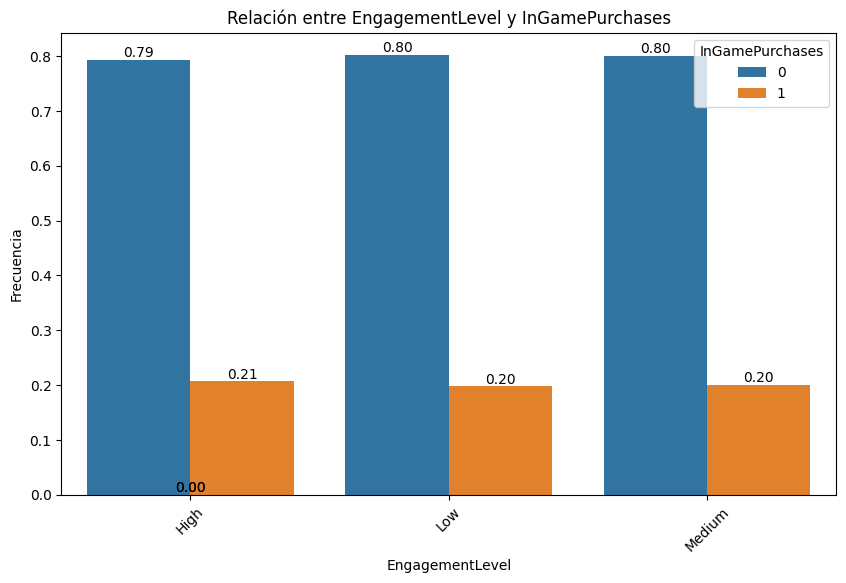

In [23]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

##### Observaciones:
Parece que el nivel de engagement no influye en la decisi√≥n de compra, no son dependientes.

#### Compras vs Gender

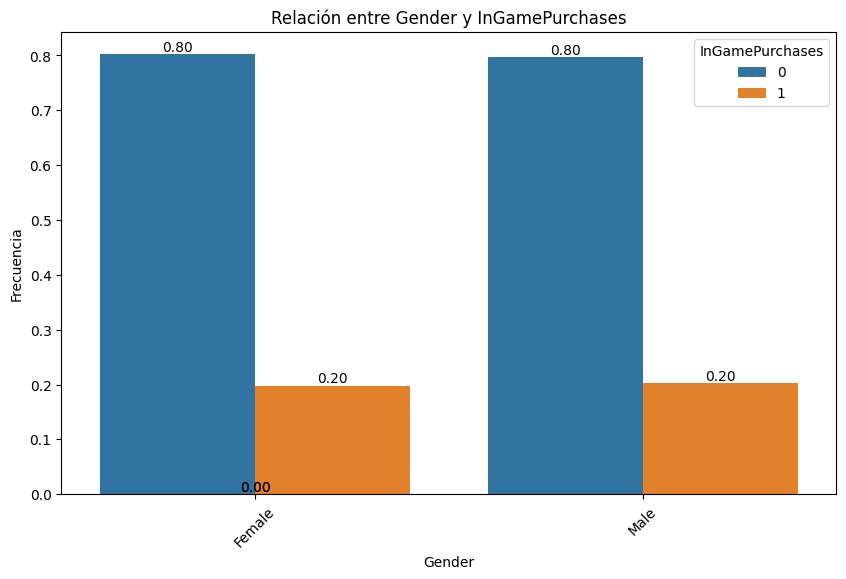

In [24]:
plot_categorical_relationship_fin(df_game_behaviour, "Gender", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

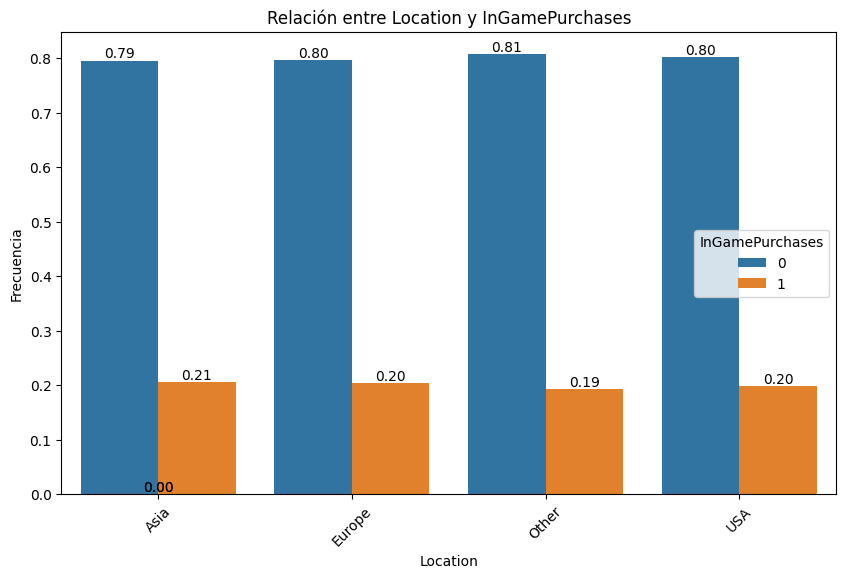

In [25]:
plot_categorical_relationship_fin(df_game_behaviour, "Location", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

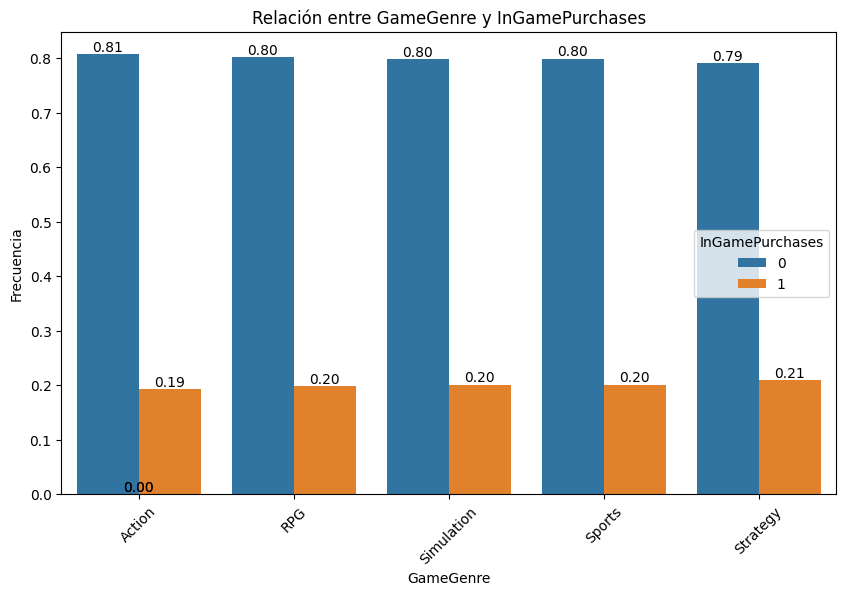

In [26]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

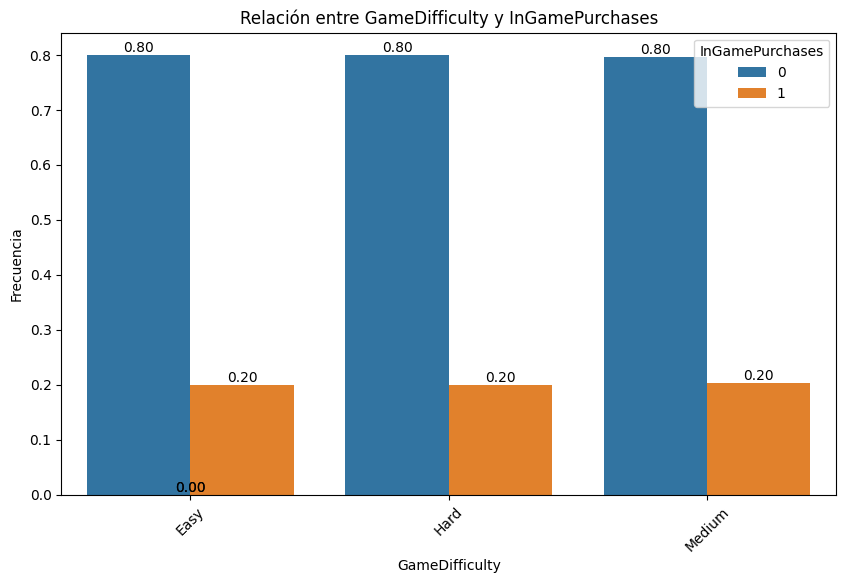

In [29]:
plot_categorical_relationship_fin(df_game_behaviour, "GameDifficulty", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

In [ ]:
plot_categorical_relationship_fin(df_game_behaviour, "GameDifficulty", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)